(-0.5, 1570.5, 2047.5, -0.5)

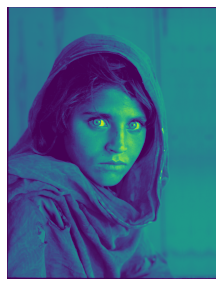

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 18})

A = imread('./afghan_girl.jpg')
B = np.mean(A, -1)

plt.figure()
#plt.imshow(255-A)
#plt.imshow(A)
plt.imshow(B)
#plt.imshow(255-B)
plt.axis('off')

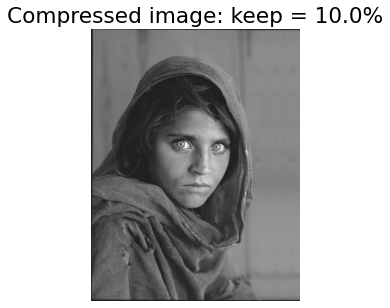

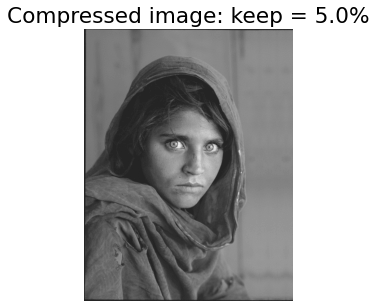

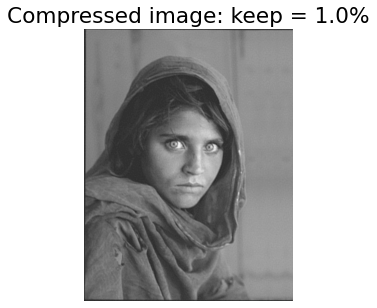

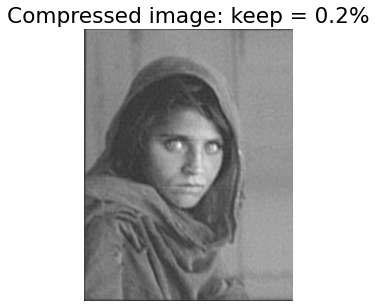

In [2]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh
    Atlow = Bt * ind
    Alow = np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow, cmap='gray')
    #plt.imshow(255-Alow, cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100) + '%')

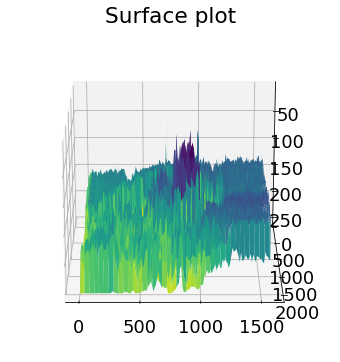

In [3]:
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1), np.arange(1, np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],256-B[0::10,0::10],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(200, 270)
plt.show()